In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
if "notebooks" in os.getcwd():
    os.chdir("..")

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Exploring data from EURBRL
We will propose a intraday trading strategy using only US dolar and brazilian real currency

In [3]:
prices_df = yf.download(
    tickers = "USDBRL=X",
    period = "60d",
    interval = "5m",
    prepost = False
)

[*********************100%***********************]  1 of 1 completed


In [4]:
prices_df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-11-15 00:00:00+00:00,5.3132,5.3321,5.3132,5.3321,5.3321,0
2022-11-15 00:10:00+00:00,5.3321,5.3321,5.3321,5.3321,5.3321,0
2022-11-15 00:15:00+00:00,5.3321,5.3321,5.3321,5.3321,5.3321,0
2022-11-15 00:25:00+00:00,5.3321,5.3321,5.3132,5.3132,5.3132,0
2022-11-15 00:30:00+00:00,5.3132,5.3321,5.3132,5.3132,5.3132,0
...,...,...,...,...,...,...
2023-02-06 21:05:00+00:00,5.1520,5.1520,5.1467,5.1499,5.1499,0
2023-02-06 21:10:00+00:00,5.1505,5.1505,5.1432,5.1445,5.1445,0
2023-02-06 21:15:00+00:00,5.1437,5.1465,5.1427,5.1427,5.1427,0


In [5]:
prices_df['Volume'].value_counts()

0    11310
Name: Volume, dtype: int64

In [6]:
prices_df\
    .isna()\
    .sum()\
    .sum()

0

In [7]:
prices_df['date'] = prices_df.index.date

In [8]:
(prices_df["Open"] == prices_df["Close"])\
    .all()

False

In [9]:
(prices_df["Open"] == prices_df["High"])\
    .all()

False

In [10]:
avg_price = np.mean(prices_df['Open'])
std_price = np.std(prices_df['Open'])

Text(0.5, 1.0, 'USDBRL prices variation in 60d')

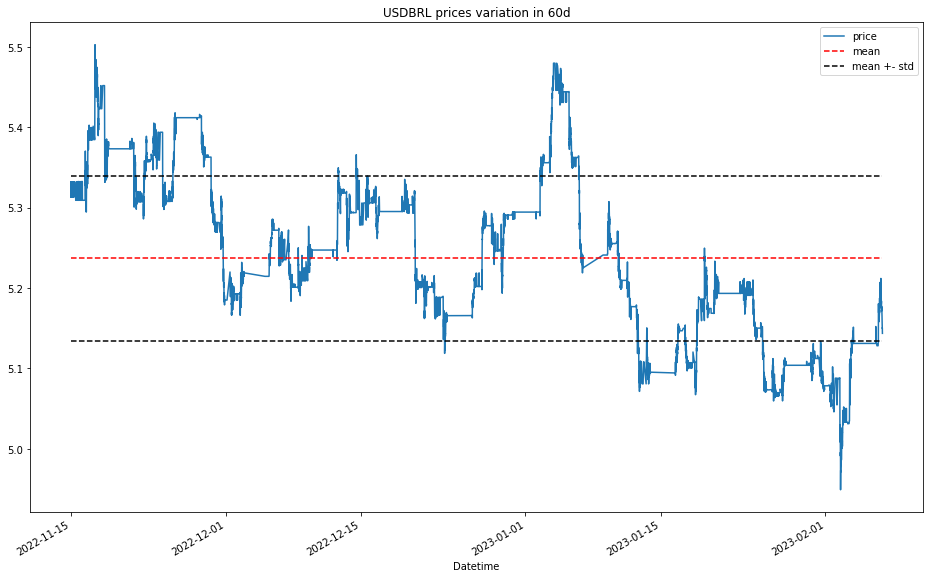

In [11]:
plt.figure(figsize=[16,10])
prices_df['Open'].plot(label = 'price')
plt.hlines(
    avg_price, 
    xmin=prices_df.index[0],
    xmax= prices_df.index[-1],
    colors = 'red',
    linestyles= 'dashed',
    label='mean'
)
plt.hlines(
    avg_price + std_price, 
    xmin=prices_df.index[0],
    xmax= prices_df.index[-1],
    colors = 'black',
    linestyles='dashed',
    label= 'mean +- std'
)
plt.hlines(
    avg_price - std_price, 
    xmin=prices_df.index[0],
    xmax= prices_df.index[-1],
    colors = 'black',
    linestyles='dashed',
    label = ''
)

plt.legend()
plt.title("USDBRL prices variation in 60d")

In [17]:
prices_df.groupby("date")\
    .nunique()\
    .Close\
    .sum()

5841